In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
city_day= pd.read_csv('G:\\IIDT\\internship\\city_day.csv\\city_day.csv')

In [3]:
display("CITY DAILY DATA")
display(city_day.head(5))

'CITY DAILY DATA'

City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN

In [4]:
cities_db = pd.read_csv('G:\\IIDT\\internship\\city_day.csv\\Indian Cities Database.csv')

In [5]:
cities = city_day['City'].value_counts()
print(f'Total number of cities in the dataset : {len(cities)}')
print(cities.index)

Total number of cities in the dataset : 24
Index(['Mumbai', 'Delhi', 'Ahmedabad', 'Bengaluru', 'Lucknow', 'Chennai',
       'Hyderabad', 'Patna', 'Gurugram', 'Amritsar', 'Jorapokhar', 'Jaipur',
       'Thiruvananthapuram', 'Amaravati', 'Brajrajnagar', 'Talcher', 'Kolkata',
       'Guwahati', 'Shillong', 'Chandigarh', 'Bhopal', 'Kochi', 'Ernakulam',
       'Aizawl'],
      dtype='object')


In [6]:
cities_db.head()

City        Lat       Long country iso2          State
0      Abohar  30.144533  74.195520   India   IN         Punjab
1    Adilabad  19.400000  78.310000   India   IN      Telangana
2    Agartala  23.836049  91.279386   India   IN        Tripura
3        Agra  27.187935  78.003944   India   IN  Uttar Pradesh
4  Ahmadnagar  19.094571  74.738432   India   IN    Maharashtra

In [7]:
100*city_day.isnull().sum()/len(city_day)

City           0.000000
Date           0.000000
PM2.5         16.358366
PM10          41.061825
NO            12.330753
NO2           12.269728
NOx           15.420115
NH3           37.556734
CO             7.479309
SO2           13.516915
O3            13.959342
Benzene       20.164766
Toluene       28.814982
Xylene        64.102369
AQI           16.331668
AQI_Bucket    16.331668
dtype: float64

In [8]:
city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26219 entries, 0 to 26218
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        26219 non-null  object 
 1   Date        26219 non-null  object 
 2   PM2.5       21930 non-null  float64
 3   PM10        15453 non-null  float64
 4   NO          22986 non-null  float64
 5   NO2         23002 non-null  float64
 6   NOx         22176 non-null  float64
 7   NH3         16372 non-null  float64
 8   CO          24258 non-null  float64
 9   SO2         22675 non-null  float64
 10  O3          22559 non-null  float64
 11  Benzene     20932 non-null  float64
 12  Toluene     18664 non-null  float64
 13  Xylene      9412 non-null   float64
 14  AQI         21937 non-null  float64
 15  AQI_Bucket  21937 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.2+ MB


In [9]:
city_day['AQI_Bucket'].value_counts()

Moderate        7813
Satisfactory    6847
Poor            2691
Very Poor       2319
Severe          1337
Good             930
Name: AQI_Bucket, dtype: int64

In [10]:
# Visualisation libraries
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

H:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
# Missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(city_day)
missing_values.style.background_gradient(cmap='PuBu')

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


In [12]:
city_day=city_day.drop(['Xylene'],axis=1)

In [13]:
city_day=city_day.dropna()

In [14]:
cities = city_day['City'].value_counts()
print(f'Total number of cities in the dataset : {len(cities)}')
print(cities.index)

Total number of cities in the dataset : 24
Index(['Mumbai', 'Delhi', 'Ahmedabad', 'Bengaluru', 'Lucknow', 'Chennai',
       'Hyderabad', 'Patna', 'Gurugram', 'Amritsar', 'Jorapokhar', 'Jaipur',
       'Thiruvananthapuram', 'Amaravati', 'Brajrajnagar', 'Talcher', 'Kolkata',
       'Guwahati', 'Shillong', 'Chandigarh', 'Bhopal', 'Kochi', 'Ernakulam',
       'Aizawl'],
      dtype='object')


In [15]:
# Convert string to datetime64
city_day['Date'] = pd.to_datetime(city_day['Date'])
#city_day.set_index('Date',inplace=True)


In [16]:
print(f"The available data is between {city_day['Date'].min()} and {city_day['Date'].max()}")

The available data is between 2015-01-01 00:00:00 and 2020-05-01 00:00:00


In [17]:
city_day['BTX'] = city_day['Benzene']+city_day['Toluene']
city_day.drop(['Benzene','Toluene'],axis=1);


In [18]:
city_day.shape

(26219, 16)

In [19]:
city_day['Particulate_Matter'] = city_day['PM2.5']+city_day['PM10']

In [20]:
pollutants = ['PM2.5','PM10','NO2', 'CO', 'SO2','O3', 'BTX']

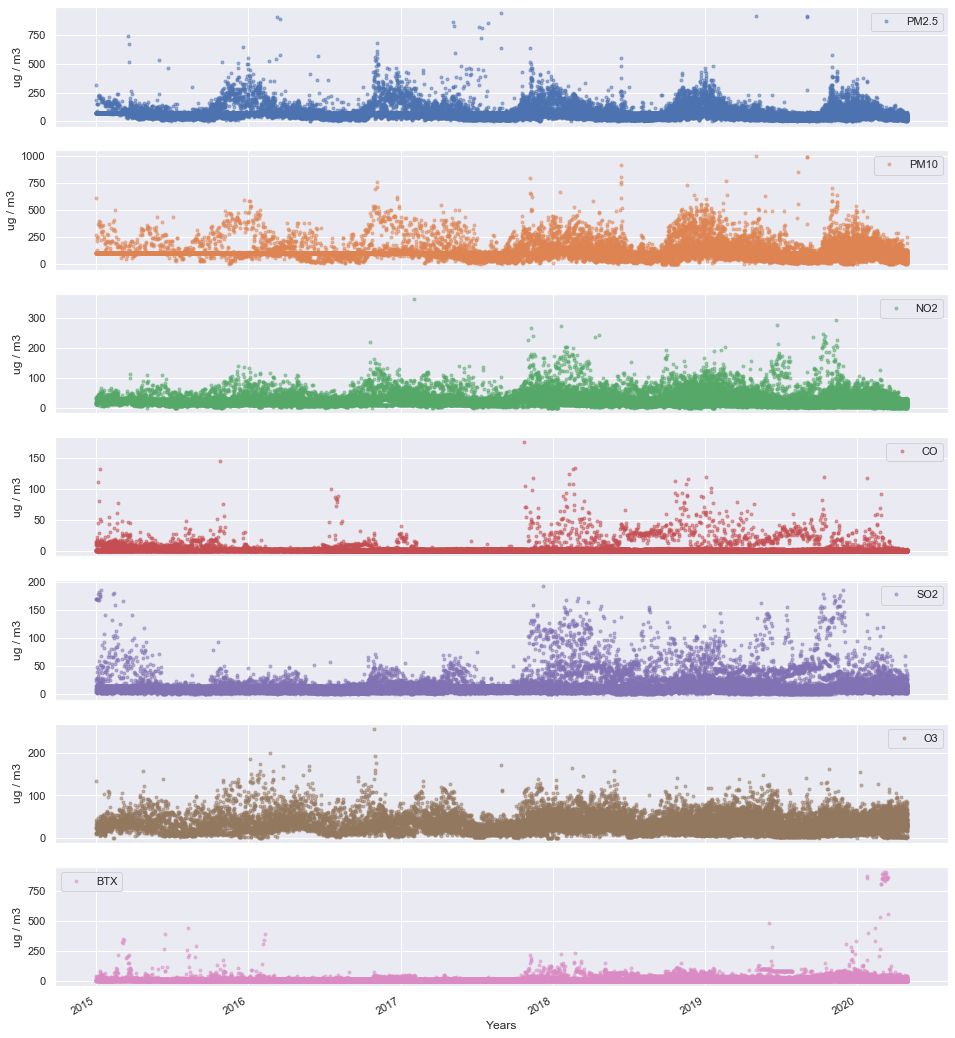

In [21]:

city_day.set_index('Date',inplace=True)
axes = city_day[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')
plt.savefig('graph.png')

In [22]:
def trend_plot(dataframe,value):
    
    # Prepare data
    df['year'] = [d.year for d in df.Date]
    df['month'] = [d.strftime('%b') for d in df.Date]
    years = df['year'].unique()

    # Draw Plot
    fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi= 80)
    sns.boxplot(x='year', y=value, data=df, ax=axes[0])
    sns.pointplot(x='month', y=value, data=df.loc[~df.year.isin([2015, 2020]), :])

    # Set Title
    axes[0].set_title('Year-wise Box Plot \n(The Trend)', fontsize=18); 
    axes[1].set_title('Month-wise Plot \n(The Seasonality)', fontsize=18)
    plt.show()

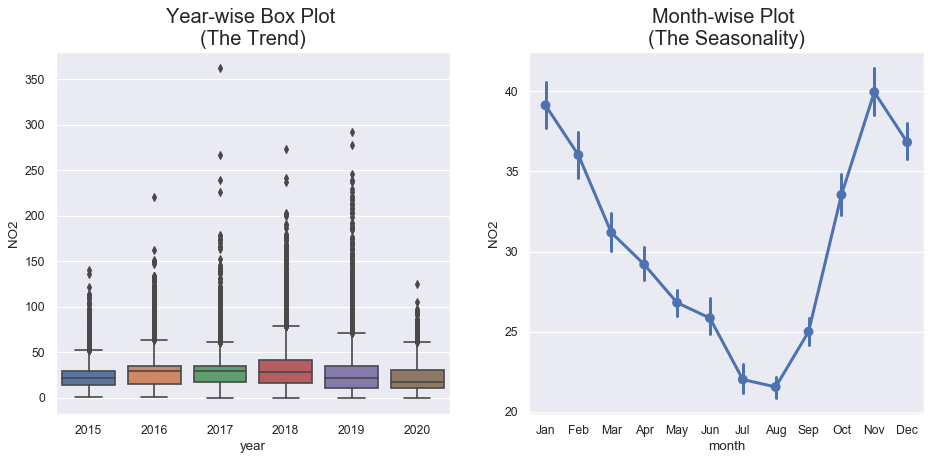

In [23]:
#NO2 

city_day.reset_index(inplace=True)

df = city_day.copy()

value='NO2'

trend_plot(df,value)


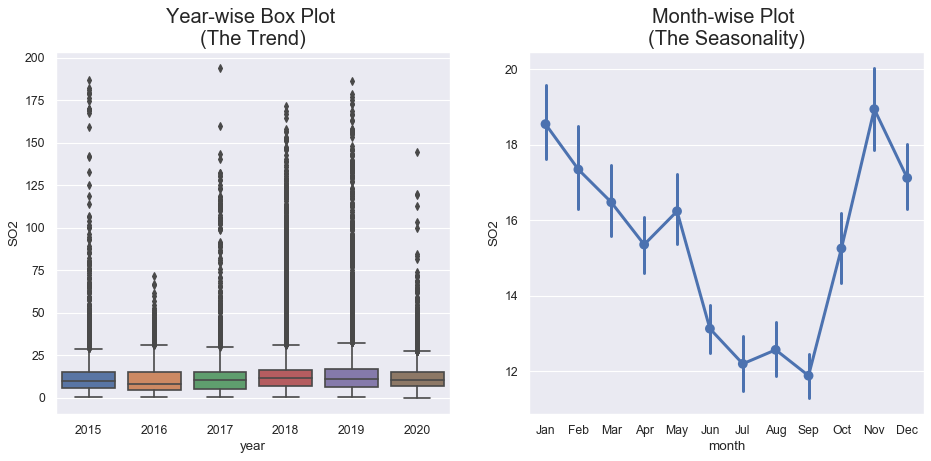

In [24]:
#city_day.reset_index(inplace=True)
df = city_day.copy()
value='SO2'
trend_plot(df,value)

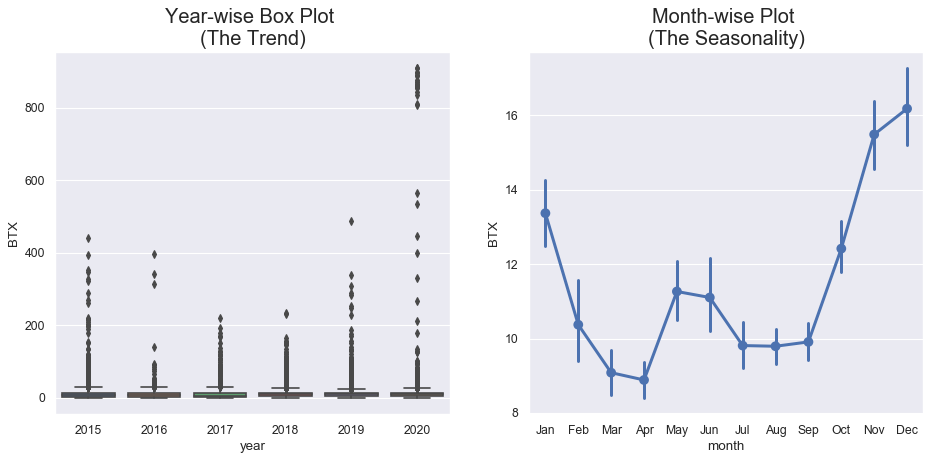

In [25]:
value='BTX'
trend_plot(df,value)

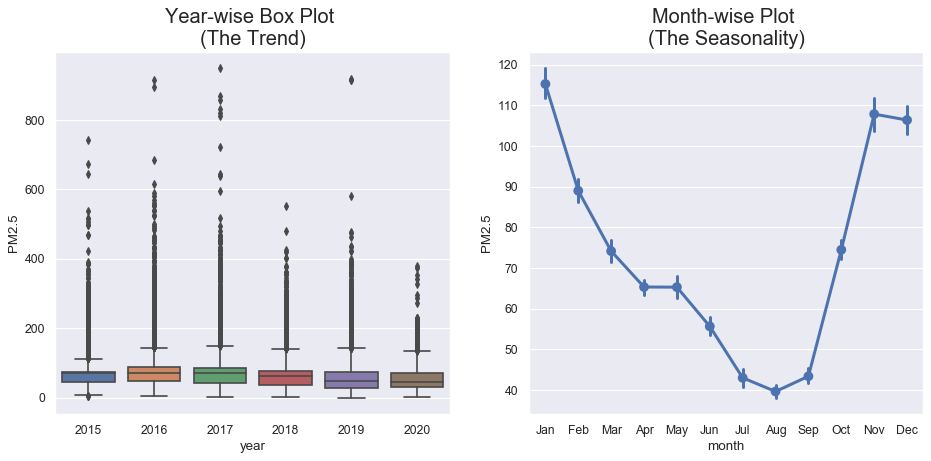

In [26]:
value='PM2.5'
trend_plot(df,value)

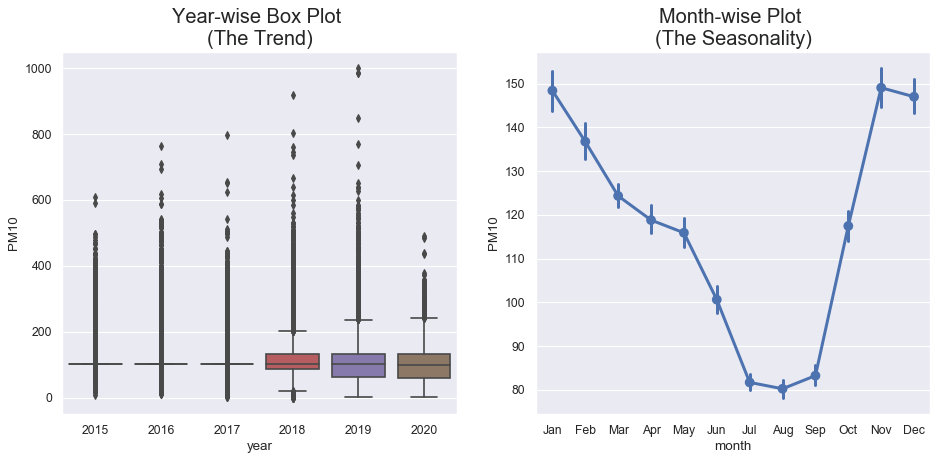

In [27]:
value='PM10'
trend_plot(df,value)

In [28]:
def max_polluted_city(pollutant):
    x1 = city_day[[pollutant,'City']].groupby(["City"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap='PuBu')

In [29]:
#source: https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.render()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [30]:
pm2_5 = max_polluted_city('PM2.5')
pm10 = max_polluted_city('PM10')
no2 = max_polluted_city('NO2')
so2 = max_polluted_city('SO2')
co = max_polluted_city('CO')
btx = max_polluted_city('BTX')


display_side_by_side(pm2_5,pm10,no2,so2,co,btx)

City PM2.5 
 
 0 
 Delhi 
 119.220000 
 
 
 1 
 Patna 
 117.540000 
 
 
 2 
 Gurugram 
 115.230000 
 
 
 3 
 Lucknow 
 109.540000 
 
 
 4 
 Ahmedabad 
 70.360000 
 
 
 5 
 Jorapokhar 
 69.970000 
 
 
 6 
 Guwahati 
 69.570000 
 
 
 7 
 Kolkata 
 68.920000 
 
 
 8 
 Talcher 
 65.370000 
 
 
 9 
 Brajrajnagar 
 65.340000 
 
 City PM10 
 
 0 
 Delhi 
 230.830000 
 
 
 1 
 Talcher 
 159.560000 
 
 
 2 
 Gurugram 
 141.420000 
 
 
 3 
 Jorapokhar 
 139.330000 
 
 
 4 
 Bhopal 
 133.050000 
 
 
 5 
 Guwahati 
 127.660000 
 
 
 6 
 Jaipur 
 124.600000 
 
 
 7 
 Kolkata 
 120.980000 
 
 
 8 
 Brajrajnagar 
 118.880000 
 
 
 9 
 Amritsar 
 115.590000 
 
 City NO2 
 
 0 
 Delhi 
 51.590000 
 
 
 1 
 Ahmedabad 
 50.730000 
 
 
 2 
 Kolkata 
 42.570000 
 
 
 3 
 Bhopal 
 37.160000 
 
 
 4 
 Patna 
 37.080000 
 
 
 5 
 Lucknow 
 33.780000 
 
 
 6 
 Jaipur 
 33.280000 
 
 
 7 
 Hyderabad 
 28.530000 
 
 
 8 
 Bengaluru 
 28.420000 
 
 
 9 
 Mumbai 
 28.270000 
 
 City SO2 
 
 0 
 Ahmedabad 
 43.280000 
 
 
 1 
 Jorapokhar 
 28.340000 
 
 
 2 
 Talcher 
 26.150000 
 
 
 3 
 Patna 
 21.870000 
 
 
 4 
 Kochi 
 18.400000 
 
 
 5 
 Delhi 
 15.910000 
 
 
 6 
 Mumbai 
 15.130000 
 
 
 7 
 Guwahati 
 14.580000 
 
 
 8 
 Amaravati 
 14.510000 
 
 
 9 
 Bhopal 
 13.500000 
 
 City CO 
 
 0 
 Ahmedabad 
 16.700000 
 
 
 1 
 Lucknow 
 2.170000 
 
 
 2 
 Delhi 
 2.010000 
 
 
 3 
 Talcher 
 1.970000 
 
 
 4 
 Brajrajnagar 
 1.950000 
 
 
 5 
 Bengaluru 
 1.880000 
 
 
 6 
 Patna 
 1.640000 
 
 
 7 
 Jorapokhar 
 1.460000 
 
 
 8 
 Ernakulam 
 1.390000 
 
 
 9 
 Gurugram 
 1.360000 
 
 City BTX 
 
 0 
 Shillong 
 83.880000 
 
 
 1 
 Ahmedabad 
 27.950000 
 
 
 2 
 Kolkata 
 27.460000 
 
 
 3 
 Delhi 
 20.800000 
 
 
 4 
 Brajrajnagar 
 13.810000 
 
 
 5 
 Guwahati 
 13.170000 
 
 
 6 
 Bhopal 
 12.330000 
 
 
 7 
 Thiruvananthapuram 
 12.330000 
 
 
 8 
 Jorapokhar 
 12.330000 
 
 
 9 
 Patna 
 12.250000

In [31]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
x2= city_day[['PM2.5','City']].groupby(["City"]).median().sort_values(by='PM2.5',ascending=False).reset_index()
x3 = city_day[['PM10','City']].groupby(["City"]).median().sort_values(by='PM10',ascending=False).reset_index()

from plotly.subplots import make_subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("PM2.5","PM10"))

fig.add_trace(go.Bar( y=x2['PM2.5'], x=x2["City"],  
                     marker=dict(color=x2['PM2.5'], coloraxis="coloraxis")),
              1, 1)


fig.add_trace(go.Bar( y=x3['PM10'], x=x2["City"],  
                     marker=dict(color=x3['PM10'], coloraxis="coloraxis")),
              1, 2)
fig.update_layout(coloraxis=dict(colorscale='reds'), showlegend=False,plot_bgcolor='white')
fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=45, tickcolor='crimson', ticklen=10,title_text="cities")
fig.update_yaxes(title_text="ug / m3", row=1, col=1)
fig.update_yaxes(title_text="ug / m3", row=1, col=2)
fig.show()

In [32]:
cities = ['Ahmedabad','Delhi','Bengaluru','Mumbai','Hyderabad','Chennai']

filtered_city_day = city_day[city_day['Date'] >= '2019-01-01']
AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]
AQI.head()

Date       City     AQI AQI_Bucket
1461 2019-01-01  Ahmedabad  1474.0     Severe
1462 2019-01-02  Ahmedabad  1246.0     Severe
1463 2019-01-03  Ahmedabad  1719.0     Severe
1464 2019-01-04  Ahmedabad  1264.0     Severe
1465 2019-01-05  Ahmedabad  1127.0     Severe

In [33]:
AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')
AQI_pivot.fillna(method='bfill',inplace=True)


from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=6, cols=1,
    #specs=[[{}, {}],
          # [{"colspan": 6}, None]],
    subplot_titles=("Ahmedabad","Bengaluru","Chennai","Delhi",'Hyderabad','Mumbai'))

fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Ahmedabad'],
                    marker=dict(color=AQI_pivot['Ahmedabad'],coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Bengaluru'],
                    marker=dict(color=AQI_pivot['Bengaluru'], coloraxis="coloraxis")),
              2, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Chennai'],
                    marker=dict(color=AQI_pivot['Chennai'], coloraxis="coloraxis")),
              3, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Delhi'],
                    marker=dict(color=AQI_pivot['Delhi'], coloraxis="coloraxis")),
              4, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Hyderabad'],
                    marker=dict(color=AQI_pivot['Hyderabad'], coloraxis="coloraxis")),
              5, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Mumbai'],
                    marker=dict(color=AQI_pivot['Mumbai'], coloraxis="coloraxis")),
              6, 1)

fig.update_layout(coloraxis=dict(colorscale='Temps'),showlegend=False,title_text="AQI Levels")

fig.update_layout(plot_bgcolor='white')

fig.update_layout( width=800,height=1200,shapes=[
      dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-25', x1= '2020-03-25'
    )
])

fig.show()
plt.savefig('AQI Levels.png')

<Figure size 432x288 with 0 Axes>

In [34]:
AQI_beforeLockdown = AQI_pivot['2020-01-01':'2020-03-25']
AQI_afterLockdown = AQI_pivot['2020-03-26':'2020-05-01']

In [35]:
print(AQI_beforeLockdown.mean())
print(AQI_afterLockdown.mean())

City
Ahmedabad    377.037700
Bengaluru     96.023529
Chennai       80.317647
Delhi        246.305882
Hyderabad     94.435294
Mumbai       148.776471
dtype: float64
City
Ahmedabad    127.972973
Bengaluru     68.513514
Chennai       62.189189
Delhi        107.378378
Hyderabad     65.675676
Mumbai        73.972973
dtype: float64


In [36]:
# Helper functions

#source: http://nicolasfauchereau.github.io/climatecode/posts/drawing-a-gauge-with-matplotlib/
from matplotlib.patches import Circle, Wedge, Rectangle

def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

In [37]:
from matplotlib.patches import Circle, Wedge, Rectangle
def gauge(labels=['GOOD','SATISFACTORY','MODERATE','POOR','VERY POOR','EXTREME'], \
          colors='jet_r', arrow=1, title='', fname=False): 
    
    """
    some sanity checks first
    

"""
    
    N = len(labels)
    
    if arrow > N: 
        raise Exception("\n\nThe category ({}) is greated than \
        the length\nof the labels ({})".format(arrow, N))
 
    
    """
    if colors is a string, we assume it's a matplotlib colormap
    and we discretize in N discrete colors 
    """
    
    if isinstance(colors, str):
        cmap = cm.get_cmap(colors, N)
        cmap = cmap(np.arange(N))
        colors = cmap[::-1,:].tolist()
    if isinstance(colors, list): 
        if len(colors) == N:
            colors = colors[::-1]
        else: 
            raise Exception("\n\nnumber of colors {} not equal \
            to number of categories{}\n".format(len(colors), N))

    """
    begins the plotting
    """
    
    fig, ax = plt.subplots()

    ang_range, mid_points = degree_range(N)

    labels = labels[::-1]
    
    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]

    
    """
    set the labels (e.g. 'LOW','MEDIUM',...)
    """

    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.05, title, horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')

    """
    plots the arrow now
    """
    
    pos = mid_points[abs(arrow - N)]
    
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """
    
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    if fname:
        fig.savefig(fname, dpi=200)

"Ahmedabad's AQI levels"

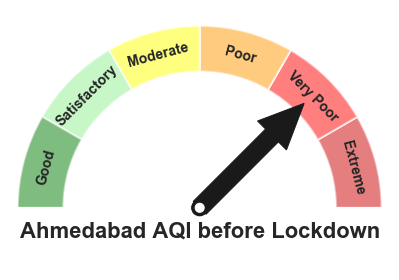

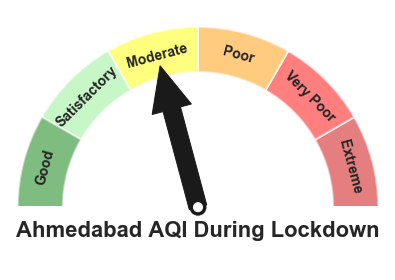

In [38]:
display("Ahmedabad's AQI levels")

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=5, title='Ahmedabad AQI before Lockdown') 

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title='Ahmedabad AQI During Lockdown') 




"Delhi's AQI levels"

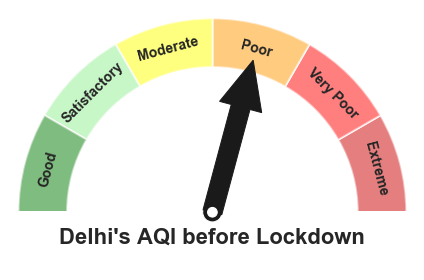

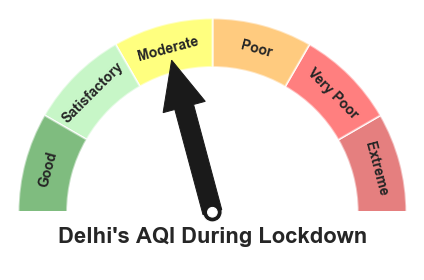

In [39]:
display("Delhi's AQI levels")

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=4, title="Delhi's AQI before Lockdown") 

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title="Delhi's AQI During Lockdown") 


"Mumbai's AQI levels"

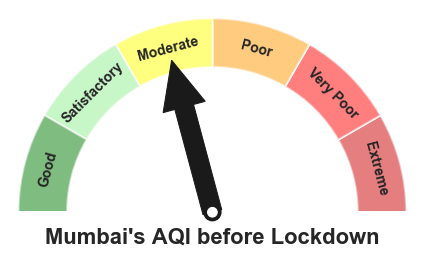

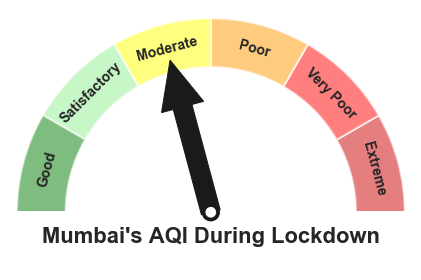

In [40]:
display("Mumbai's AQI levels")

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title="Mumbai's AQI before Lockdown") 

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title="Mumbai's AQI During Lockdown") 


In [41]:
#city_day.set_index('Date',inplace=True)

start_date1 = '2019-01-01'
end_date1 = '2019-05-01'

mask1 = (city_day['Date'] >= start_date1) & (city_day['Date']  <= end_date1)
pollutants_filtered_2019 = city_day.loc[mask1]
pollutants_filtered_2019.fillna(method='bfill',inplace=True)
pollutants_filtered_2019.set_index('Date',inplace=True);

start_date2 = '2020-01-01'
end_date2 = '2020-05-01'

mask2 = (city_day['Date'] >= start_date2) & (city_day['Date']  <= end_date2)
pollutants_filtered_2020 = city_day.loc[mask2]
pollutants_filtered_2020.fillna(method='bfill',inplace=True)
pollutants_filtered_2020.set_index('Date',inplace=True);


df1 = pollutants_filtered_2019[pollutants_filtered_2019.City.isin(cities)][['City','NO2','SO2','PM2.5','CO']]
df2 = pollutants_filtered_2020[pollutants_filtered_2020.City.isin(cities)][['City','NO2','SO2','PM2.5','CO']]

H:\Anaconda\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
def pollution_comparison(city):
    """
    Function to plot graph comparing pollutin levels between (Jan-May)2019 and (Jan-May)2020
    
    """
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['NO2'],
                    line=dict(dash='solid',color='green'),name='NO2'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['SO2'],
                    line=dict(dash='dot',color='red'),name='SO2'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['PM2.5'],
                    line=dict(dash='dashdot',color='dodgerblue'),name='Particulate_Matter'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['CO'],
                    line=dict(dash='longdashdot'),mode='lines',name='CO'))
    fig.update_layout(title_text=city+' 2019 ',plot_bgcolor='white')
    fig.update_xaxes(rangeslider_visible=True,zeroline=True,zerolinewidth=1, zerolinecolor='Black')
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['NO2'],
                    line=dict(dash='solid',color='green'),name='NO2'))
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['SO2'],
                    line=dict(dash='dot',color='red'),name='SO2'))
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['PM2.5'],
                    line=dict(dash='dashdot',color='dodgerblue'),name='Particulate_Matter'))
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['CO'],
                    line=dict(dash='longdashdot'),mode='lines',name='CO'))
    fig.update_layout(title_text=city+' 2020 ',plot_bgcolor='white')
    fig.update_xaxes(rangeslider_visible=True,zeroline=True,zerolinewidth=1, zerolinecolor='Black')
    fig.show()


In [43]:
pollution_comparison('Ahmedabad')
fig.savefig('Ahmedabad.png')

AttributeError: 'Figure' object has no attribute 'savefig'